In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.src.layers import LSTM, Dense
from keras.src.layers import Dropout
from keras import Model, Input
from keras.src.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np


In [16]:
# Load your data
df = pd.read_csv("jobs_in_data.csv")

# Split the 'salary_in_usd' column by 1000
df['salary_in_usd'] /= 1000

# Define features and target variable
X_numerical = df.select_dtypes(include=np.number).drop(
    columns=["salary_in_usd", "salary"])  # Select only numeric columns
y = df["salary_in_usd"]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Split data into train and test sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to include timestep dimension
X_train_reshaped = X_train_num.reshape(X_train_num.shape[0], X_train_num.shape[1], 1)
X_test_reshaped = X_test_num.reshape(X_test_num.shape[0], X_test_num.shape[1], 1)

# Define LSTM model
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_layer = LSTM(128, return_sequences=True)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
lstm_layer2 = LSTM(64)(dropout_layer)
output_layer = Dense(1, activation='linear')(lstm_layer2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))


Epoch 1/100
211/211 [==============================] - 18s 30ms/step - loss: 23861.4863 - val_loss: 20065.5254
Epoch 2/100
211/211 [==============================] - 6s 27ms/step - loss: 18148.7207 - val_loss: 16717.2148
Epoch 3/100
211/211 [==============================] - 4s 19ms/step - loss: 15423.0566 - val_loss: 14384.2949
Epoch 4/100
211/211 [==============================] - 4s 18ms/step - loss: 13312.9268 - val_loss: 12474.0977
Epoch 5/100
211/211 [==============================] - 4s 19ms/step - loss: 11561.8047 - val_loss: 10871.6084
Epoch 6/100
211/211 [==============================] - 3s 13ms/step - loss: 10086.5498 - val_loss: 9516.6992
Epoch 7/100
211/211 [==============================] - 3s 13ms/step - loss: 8845.8984 - val_loss: 8385.4111
Epoch 8/100
211/211 [==============================] - 3s 15ms/step - loss: 7804.8374 - val_loss: 7436.6997
Epoch 9/100
211/211 [==============================] - 3s 13ms/step - loss: 6939.0742 - val_loss: 6651.1621
Epoch 10/100
211

Mean Squared Error: 4084.3665521731436
Root Mean Squared Error: 63.909049063283234

['salary_in_usd'] / ['salary'] 


In [17]:
# Load your data
df = pd.read_csv("jobs_in_data.csv")

# Split the 'salary_in_usd' column by 1000
df['salary_in_usd'] /= 1000

# Calculate the ratio of "salary_in_usd" to "salary"
df['salary_ratio'] = df['salary_in_usd'] / df['salary']

# Define features and target variable
X_numerical = df.select_dtypes(include=np.number).drop(
    columns=["salary_in_usd", "salary"])  # Select only numeric columns
y = df["salary_in_usd"]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Split data into train and test sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to include timestep dimension
X_train_reshaped = X_train_num.reshape(X_train_num.shape[0], X_train_num.shape[1], 1)
X_test_reshaped = X_test_num.reshape(X_test_num.shape[0], X_test_num.shape[1], 1)

# Define LSTM model
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_layer = LSTM(128, return_sequences=True)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
lstm_layer2 = LSTM(64)(dropout_layer)
output_layer = Dense(1, activation='linear')(lstm_layer2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
# print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


Epoch 1/100
211/211 [==============================] - 19s 30ms/step - loss: 22610.9805 - val_loss: 19545.8242
Epoch 2/100
211/211 [==============================] - 4s 19ms/step - loss: 17630.6074 - val_loss: 16079.5811
Epoch 3/100
211/211 [==============================] - 4s 20ms/step - loss: 14638.8467 - val_loss: 13463.6426
Epoch 4/100
211/211 [==============================] - 4s 20ms/step - loss: 12284.7783 - val_loss: 11352.9814
Epoch 5/100
211/211 [==============================] - 4s 21ms/step - loss: 10375.2920 - val_loss: 9635.1289
Epoch 6/100
211/211 [==============================] - 4s 18ms/step - loss: 8828.1270 - val_loss: 8250.1982
Epoch 7/100
211/211 [==============================] - 4s 18ms/step - loss: 7582.1943 - val_loss: 7140.2505
Epoch 8/100
211/211 [==============================] - 4s 18ms/step - loss: 6595.2783 - val_loss: 6268.6548
Epoch 9/100
211/211 [==============================] - 4s 17ms/step - loss: 5827.7852 - val_loss: 5599.9434
Epoch 10/100
211/2

['salary_in_usd'] / ['salary'] 
RMSE: 60.78381977426994

experience_mapping for ['experience_level']

In [18]:
# Load your data
df = pd.read_csv("jobs_in_data.csv")

# Split the 'salary_in_usd' column by 1000
df['salary_in_usd'] /= 1000

# Calculate the ratio of "salary_in_usd" to "salary"
df['salary_ratio'] = df['salary_in_usd'] / df['salary']

experience_mapping = {
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior': 3,
    'Executive': 4
}

# Map experience levels to ordinal numbers
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)

# Define features and target variable
X_numerical = df.select_dtypes(include=np.number).drop(
    columns=["salary_in_usd", "salary"])  # Select only numeric columns
y = df["salary_in_usd"]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Split data into train and test sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to include timestep dimension
X_train_reshaped = X_train_num.reshape(X_train_num.shape[0], X_train_num.shape[1], 1)
X_test_reshaped = X_test_num.reshape(X_test_num.shape[0], X_test_num.shape[1], 1)

# Define LSTM model
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_layer = LSTM(128, return_sequences=True)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
lstm_layer2 = LSTM(64)(dropout_layer)
output_layer = Dense(1, activation='linear')(lstm_layer2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
# print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


Epoch 1/100
211/211 [==============================] - 14s 29ms/step - loss: 22351.6348 - val_loss: 19712.3477
Epoch 2/100
211/211 [==============================] - 4s 20ms/step - loss: 17930.6953 - val_loss: 16432.7637
Epoch 3/100
211/211 [==============================] - 4s 20ms/step - loss: 14972.0225 - val_loss: 13767.4268
Epoch 4/100
211/211 [==============================] - 4s 20ms/step - loss: 12557.3984 - val_loss: 11591.9756
Epoch 5/100
211/211 [==============================] - 4s 20ms/step - loss: 10582.8506 - val_loss: 9813.1934
Epoch 6/100
211/211 [==============================] - 5s 22ms/step - loss: 8975.1074 - val_loss: 8373.9229
Epoch 7/100
211/211 [==============================] - 4s 20ms/step - loss: 7685.1714 - val_loss: 7223.0566
Epoch 8/100
211/211 [==============================] - 4s 21ms/step - loss: 6663.7358 - val_loss: 6325.9531
Epoch 9/100
211/211 [==============================] - 4s 21ms/step - loss: 5870.7251 - val_loss: 5632.1987
Epoch 10/100
211/2

experience_mapping for ['experience_level']
RMSE: 57.54844132269867

distance from  ["employee_residence"] - ["company_location"] 

In [134]:
df = pd.read_csv("jobs_in_data.csv")

# Split the 'salary_in_usd' column by 1000
df['salary_in_usd'] /= 1000

# Calculate the ratio of "salary_in_usd" to "salary"
df['salary_ratio'] = df['salary_in_usd'] / df['salary']

experience_mapping = {
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior': 3,
    'Executive': 4
}

# Map experience levels to ordinal numbers
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)


# Calculate the percentile rank of each salary within its job category
df['Percentile'] = df.groupby('job_category')['salary'].rank(pct=True)

# Normalize the percentile ranks to a scale of 0 to 1
min_percentile = df['Percentile'].min()
max_percentile = df['Percentile'].max()
df['Normalized_Salary_within_Job_Category'] = (df['Percentile'] - min_percentile) / (max_percentile - min_percentile)

# Drop the temporary 'Percentile' column if you don't need it anymore
df.drop(columns=['Percentile'], inplace=True)

# Define features and target variable
X_numerical = df.select_dtypes(include=np.number).drop(
    columns=["salary_in_usd", "salary"])  # Select only numeric columns
y = df["salary_in_usd"]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Split data into train and test sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to include timestep dimension
X_train_reshaped = X_train_num.reshape(X_train_num.shape[0], X_train_num.shape[1], 1)
X_test_reshaped = X_test_num.reshape(X_test_num.shape[0], X_test_num.shape[1], 1)

# Define LSTM model
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_layer = LSTM(128, return_sequences=True)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
lstm_layer2 = LSTM(64)(dropout_layer)
output_layer = Dense(1, activation='linear')(lstm_layer2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])


# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
# print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


Epoch 1/100
106/106 [==============================] - 4s 11ms/step - loss: 16256.1494 - mse: 16256.1494 - val_loss: 9955.7607 - val_mse: 9955.7607
Epoch 2/100
106/106 [==============================] - 1s 6ms/step - loss: 7026.3799 - mse: 7026.3799 - val_loss: 5222.2876 - val_mse: 5222.2876
Epoch 3/100
106/106 [==============================] - 1s 6ms/step - loss: 4467.0806 - mse: 4467.0806 - val_loss: 4188.1245 - val_mse: 4188.1245
Epoch 4/100
106/106 [==============================] - 1s 6ms/step - loss: 3997.3284 - mse: 3997.3284 - val_loss: 4032.2065 - val_mse: 4032.2065
Epoch 5/100
106/106 [==============================] - 1s 6ms/step - loss: 3859.8037 - mse: 3859.8037 - val_loss: 3895.7830 - val_mse: 3895.7830
Epoch 6/100
106/106 [==============================] - 1s 6ms/step - loss: 3714.5867 - mse: 3714.5867 - val_loss: 2581.5972 - val_mse: 2581.5972
Epoch 7/100
106/106 [==============================] - 1s 6ms/step - loss: 1958.4340 - mse: 1958.4340 - val_loss: 1720.2968 - v

Normalized Salary within Job Category
RMSE: 24.779573173916585

59/59 [==============================] - 0s 2ms/step


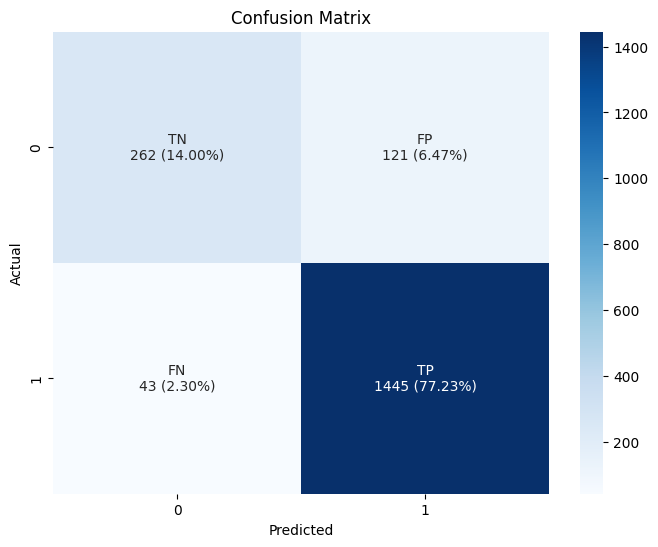

Accuracy: 0.9123463388562266
Precision: 0.9227330779054917
Recall: 0.9711021505376344
RMSE: 25.571405026123266


In [137]:
# Make predictions on the scaled test set
predictions_scaled = model.predict(X_test_reshaped)

# Convert predictions back to original scale
predictions = predictions_scaled.flatten()

# Define thresholds for classification
threshold_positive = 100  # Define a suitable threshold based on your problem

# Classify predictions into two categories based on the threshold
y_test_class = (y_test >= threshold_positive)
predictions_class = (predictions >= threshold_positive)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_class, predictions_class)

# Calculate percentages
total = np.sum(conf_matrix)
percentages = (conf_matrix / total) * 100

# Define labels for each cell with amount, percentage, and the type of classification
labels = np.empty_like(conf_matrix, dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == 0 and j == 0:  # True Negative
            labels[i, j] = f"TN\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        elif i == 0 and j == 1:  # False Positive
            labels[i, j] = f"FP\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        elif i == 1 and j == 0:  # False Negative
            labels[i, j] = f"FN\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        else:  # True Positive
            labels[i, j] = f"TP\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test_class, predictions_class)
precision = precision_score(y_test_class, predictions_class)
recall = recall_score(y_test_class, predictions_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate and print RMSE
mse = mean_squared_error(y_test, predictions)
print("RMSE:", np.sqrt(mse))